# Importing Libraries

In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import numpy as np
from numpy.linalg import inv
import pandas as pd
from tqdm import tqdm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Reading the Data

In [2]:
data = pd.read_excel('Concrete_Data.xls')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# Train-Test Split

In [3]:
X = data.drop(columns = ['Concrete compressive strength(MPa, megapascals) '])
X_0 = [1]*len(X)
X['X_0'] = X_0

y = data['Concrete compressive strength(MPa, megapascals) ']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1a) Batch Gradient Descent Equations

$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})^2 \\  
\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x^{(i)}_{(j)} \\
\theta := \theta -\alpha \frac{\delta}{\delta \theta}J(\theta)
$$

In [5]:
def gradient_descent(X, y, weights, alpha, n_iters, X_test, y_test):
    m = X.shape[0]
    i=1
    global loss_train, loss_test, iter
    loss_train = []
    loss_test = []
    iter = []
    for j in range(n_iters):
        predictions = X @ weights
        errors = predictions - y
        gradient = X.T @ errors / m
        weights -= alpha * gradient
        
        loss = mean_squared_error(y_train, predictions)
        
        if (i == 1) or (i%10 == 0) or (i == n_iters):
            if (i == 1) or (i%1000 == 0) or (i == n_iters):
                print('Epoch [{}/{}], Loss: {:.4f}'.format(i, n_iters, loss))
            
            loss_train.append(loss)
            
            preds_test = X_test @ weights
            loss_t = mean_squared_error(preds_test, y_test)
            loss_test.append(loss_t)
            
            iter.append(i)
        i+=1
    return weights

In [6]:
weights = np.random.randn(X.shape[1])
weights = gradient_descent(X_train, y_train, weights, 0.0000005, 10000, X_test, y_test)

Epoch [1/10000], Loss: 6337808.8948
Epoch [1000/10000], Loss: 462.1389
Epoch [2000/10000], Loss: 239.9538
Epoch [3000/10000], Loss: 182.4445
Epoch [4000/10000], Loss: 156.4729
Epoch [5000/10000], Loss: 142.5011
Epoch [6000/10000], Loss: 134.6793
Epoch [7000/10000], Loss: 130.2297
Epoch [8000/10000], Loss: 127.6523
Epoch [9000/10000], Loss: 126.1172
Epoch [10000/10000], Loss: 125.1632


In [7]:
weights

Cement (component 1)(kg in a m^3 mixture)                0.138887
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.130919
Fly Ash (component 3)(kg in a m^3 mixture)               0.131333
Water  (component 4)(kg in a m^3 mixture)               -0.252998
Superplasticizer (component 5)(kg in a m^3 mixture)     -0.753000
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.000530
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.033910
Age (day)                                                0.112475
X_0                                                     -0.197762
dtype: float64

In [8]:
y_pred_train = X_train @ weights

y_pred_test = X_test @ weights

r2score_train = r2_score(y_train, y_pred_train)
mse_train_lin = mean_squared_error(y_train, y_pred_train)
print('mean_squared_error_train =', mse_train_lin)
print('r2_score_train =', r2score_train,'\n')

r2score_test = r2_score(y_test, y_pred_test)
mse_test_lin = mean_squared_error(y_test, y_pred_test)
print('mean_squared_error_test =', mse_test_lin)
print('r2_score_test =', r2score_test)

mean_squared_error_train = 125.16242770140252
r2_score_train = 0.5561028846172119 

mean_squared_error_test = 116.98398010444645
r2_score_test = 0.5676517079656516


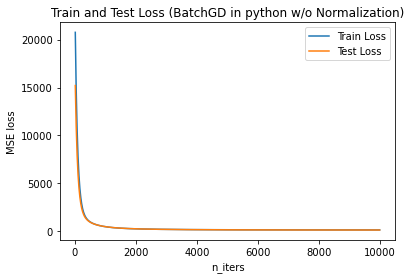

In [9]:
plt.plot(iter[1:], loss_train[1:])
plt.plot(iter[1:], loss_test[1:])
plt.legend(['Train Loss', 'Test Loss'])
plt.ylabel('MSE loss')
plt.xlabel('n_iters')
plt.title('Train and Test Loss (BatchGD in python w/o Normalization)')
plt.show()

- **We can observe that for higher learning rates [0.000001 to 0.1], the gradients explode and diverge to Infinity**
- **The model convereges for learning rates in the order of $10^{-7}$**

# 1b) Batch Gradient Descent in Python with Data Normalization

In [10]:
X = data.drop(columns = ['Concrete compressive strength(MPa, megapascals) '])
y = data['Concrete compressive strength(MPa, megapascals) ']
X = X.astype(np.float32)
y = y.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_norm=(X_train-X_train.mean())/X_train.std() #Standard Normalization
X_0 = [1]*len(X_train_norm)
X_train_norm['X_0'] = X_0

X_test_norm=(X_test-X_test.mean())/X_test.std() #Standard Normalization
X_0_ = [1]*len(X_test_norm)
X_test_norm['X_0'] = X_0_

In [11]:
weights = np.random.randn(X_train_norm.shape[1])
weights = gradient_descent(X_train_norm, y_train, weights, 0.005, 1500, X_test_norm, y_test)

Epoch [1/1500], Loss: 1573.5406
Epoch [1000/1500], Loss: 114.2139
Epoch [1500/1500], Loss: 112.5156


In [12]:
y_pred_train = X_train_norm @ weights

y_pred_test = X_test_norm @ weights

r2score_train = r2_score(y_train, y_pred_train)
mse_train_lin = mean_squared_error(y_train, y_pred_train)
print('mean_squared_error_train =', mse_train_lin)
print('r2_score_train =', r2score_train,'\n')

r2score_test = r2_score(y_test, y_pred_test)
mse_test_lin = mean_squared_error(y_test, y_pred_test)
print('mean_squared_error_test =', mse_test_lin)
print('r2_score_test =', r2score_test)

mean_squared_error_train = 112.51309858980213
r2_score_train = 0.6009646057209561 

mean_squared_error_test = 113.75906140356625
r2_score_test = 0.5795703254585598


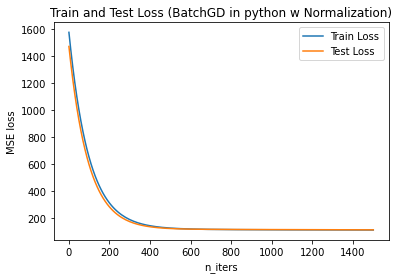

In [13]:
plt.plot(iter, loss_train)
plt.plot(iter, loss_test)
plt.legend(['Train Loss', 'Test Loss'])
plt.ylabel('MSE loss')
plt.xlabel('n_iters')
plt.title('Train and Test Loss (BatchGD in python w Normalization)')
plt.show()

- **With Normalization we can observe that, the weights converge faster with less number of epochs**
- **With Normalization we can notice that the gradients don't explode for larger values of alpha[0.0001 to 0.01]**

# 1c) (a) pytorch implementation of BGD

In [14]:
X = data.drop(columns = ['Concrete compressive strength(MPa, megapascals) '])
y = data['Concrete compressive strength(MPa, megapascals) ']
X = X.astype(np.float32)
y = y.astype(np.float32)

In [15]:
X1 = X.to_numpy()
y1 = y.to_numpy()

inputs = torch.from_numpy(X1) # Converting to torch tensors
target = torch.from_numpy(y1) # Converting to torch tensors

In [16]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, random_state=42)

In [17]:
def model(x):
    return x @ w.t() + b

In [18]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

def r2s(t1, t2):
    t1 = t1.detach().numpy()
    t2 = t2.detach().numpy()
    return r2_score(t1, t2)

In [19]:
# Compute gradients
def BatchGradientDescent(X_train, y_train, w, b, alpha, n_iters, X_test, y_test):
    i=1
    global loss_train, loss_test, iter
    loss_train = []
    loss_test = []
    iter = []

    for j in range(n_iters):
        
        preds = model(X_train)
        loss = mse(preds, y_train)
        
        if (i == 1) or (i%10 == 0) or (i == n_iters):
            if (i == 1) or (i%1000 == 0) or (i == n_iters):
                print('Epoch [{}/{}], Loss: {:.4f}'.format(i, n_iters, loss))
            
            loss_train.append(loss)
            
            preds_test = model(X_test)
            loss_t = mse(preds_test, y_test)
            loss_test.append(loss_t)
            
            iter.append(i)
        loss.backward()
        i+=1
        
        with torch.no_grad():
            w -= w.grad * alpha
            b -= b.grad * alpha
            w.grad.zero_()
            b.grad.zero_()

In [20]:
# Initializing weights and bias
w = torch.randn(1, X_train.shape[1], requires_grad=True)
b = torch.randn(1, requires_grad=True)

BatchGradientDescent(X_train, y_train, w, b, 5e-7, 6000, X_test, y_test)

Epoch [1/6000], Loss: 2822415.2500
Epoch [1000/6000], Loss: 712.1735
Epoch [2000/6000], Loss: 414.5108
Epoch [3000/6000], Loss: 334.5761
Epoch [4000/6000], Loss: 309.6476
Epoch [5000/6000], Loss: 301.6294
Epoch [6000/6000], Loss: 298.8491


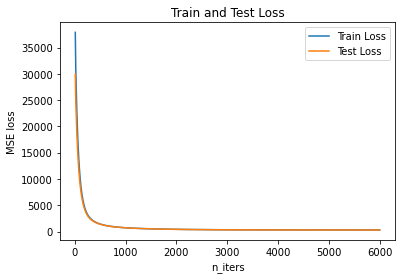

In [21]:
loss_train_values = [i.detach().numpy() for i in loss_train]
loss_test_values = [i.detach().numpy() for i in loss_test]
plt.plot(iter[1:], loss_train_values[1:])
plt.plot(iter[1:], loss_test_values[1:])
plt.legend(['Train Loss', 'Test Loss'])
plt.ylabel('MSE loss')
plt.xlabel('n_iters')
plt.title('Train and Test Loss')
plt.show()

- We can observe that there are two minimas for this optimization problem (one local and another global) and it depends on the initialization of weights

# 1c) (b) pytorch implementation of BGD with Normalization

In [22]:
X = data.drop(columns = ['Concrete compressive strength(MPa, megapascals) '])
y = data['Concrete compressive strength(MPa, megapascals) ']

X_norm=(X-X.mean())/X.std() #Standard Normalization

X_norm = X_norm.astype(np.float32)
y = y.astype(np.float32)

In [23]:
X1 = X_norm.to_numpy()
y1 = y.to_numpy()

inputs = torch.from_numpy(X1)
target = torch.from_numpy(y1)

In [24]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(inputs, target, test_size=0.3, random_state=42)

In [25]:
# Initializing weights and bias
w = torch.randn(1, X_train_norm.shape[1], requires_grad=True)
b = torch.randn(1, requires_grad=True)

BatchGradientDescent(X_train_norm, y_train_norm, w, b, 5e-2, 10000, X_test_norm, y_test_norm)

Epoch [1/10000], Loss: 1464.8721
Epoch [1000/10000], Loss: 281.9628
Epoch [2000/10000], Loss: 281.9627
Epoch [3000/10000], Loss: 281.9627
Epoch [4000/10000], Loss: 281.9627
Epoch [5000/10000], Loss: 281.9627
Epoch [6000/10000], Loss: 281.9627
Epoch [7000/10000], Loss: 281.9627
Epoch [8000/10000], Loss: 281.9627
Epoch [9000/10000], Loss: 281.9627
Epoch [10000/10000], Loss: 281.9627


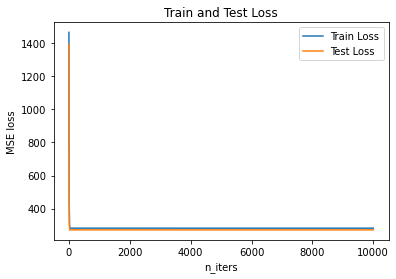

In [26]:
loss_train_values = [i.detach().numpy() for i in loss_train]
loss_test_values = [i.detach().numpy() for i in loss_test]
plt.plot(iter[0:], loss_train_values[0:])
plt.plot(iter[0:], loss_test_values[0:])
plt.legend(['Train Loss', 'Test Loss'])
plt.ylabel('MSE loss')
plt.xlabel('n_iters')
plt.title('Train and Test Loss')
plt.show()

- **With Normalization we can observe that, the weights converge faster with less number of epochs**

# 2) (a) SGD, Scratch, normalization

In [27]:
X = data.drop(columns = ['Concrete compressive strength(MPa, megapascals) '])
y = data['Concrete compressive strength(MPa, megapascals) ']
X = X.astype(np.float32)
y = y.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_norm=(X_train-X_train.mean())/X_train.std() #Standard Normalization
X_0 = [1]*len(X_train_norm)
X_train_norm['X_0'] = X_0

y_train = y_train.to_numpy()

X_test_norm=(X_test-X_test.mean())/X_test.std() #Standard Normalization
X_0_ = [1]*len(X_test_norm)
X_test_norm['X_0'] = X_0_

y_test = y_test.to_numpy()

In [28]:
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    datastack = np.hstack((X, y.reshape((-1, 1))))
    np.random.shuffle(datastack)
    n_minibatches = datastack.shape[0] // batch_size
    i = 0

    for i in range(n_minibatches):
        try:
            mini_batch = datastack[i * batch_size:(i + 1)*batch_size]
            X_mini = mini_batch[:, :-1]
            Y_mini = mini_batch[:, -1]
            mini_batches.append((X_mini, Y_mini))
        except:
            mini_batch = datastack[i * batch_size:]
            X_mini = mini_batch[:, :-1]
            Y_mini = mini_batch[:, -1]
            mini_batches.append((X_mini, Y_mini))
    return mini_batches

In [29]:
def stochastic_gradient_descent(X, y, weights, alpha, n_iters, batch_size, X_test, y_test):
    m = X.shape[0]
    k = batch_size
    i=1
    global loss_train, loss_test, iter
    loss_train = []
    loss_test = []
    iter = []
    for j in range(n_iters):
        
        mini_batches = create_mini_batches(X, y, k)
            
        for mini_batch in mini_batches:

            X_mini, y_mini = mini_batch

            predictions = X_mini @ weights
            errors = predictions - y_mini
            gradient = X_mini.T @ errors / k
            weights -= alpha * gradient
        
        predictions = X @ weights
        
        loss = mean_squared_error(y, predictions)
        
        if (i == 1) or (i%10 == 0) or (i == n_iters):
            if (i == 1) or (i%1000 == 0) or (i == n_iters):
                print('Epoch [{}/{}], Loss: {:.4f}'.format(i, n_iters, loss))
            
            loss_train.append(loss)
            
            preds_test = X_test @ weights
            loss_t = mean_squared_error(preds_test, y_test)
            loss_test.append(loss_t)
            
            iter.append(i)
        i+=1
    return weights

In [30]:
weights = np.random.randn(X_train_norm.shape[1])
weights = stochastic_gradient_descent(X_train_norm, y_train, weights, 0.0005, 6000, 1, X_test_norm, y_test)

Epoch [1/6000], Loss: 798.1983
Epoch [1000/6000], Loss: 107.2702
Epoch [2000/6000], Loss: 107.2605
Epoch [3000/6000], Loss: 107.2607
Epoch [4000/6000], Loss: 107.2617
Epoch [5000/6000], Loss: 107.2600
Epoch [6000/6000], Loss: 107.2687


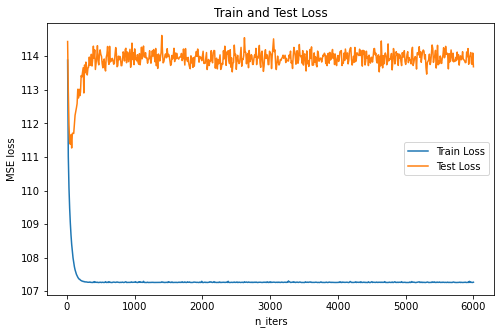

In [31]:
plt.figure(figsize=(8, 5))
a = 1
b = 6000
plt.plot(iter[a:b], loss_train[a:b])
plt.plot(iter[a:b], loss_test[a:b])
plt.legend(['Train Loss', 'Test Loss'])
plt.ylabel('MSE loss')
plt.xlabel('n_iters')
plt.title('Train and Test Loss')
plt.show()

- **We can see that the convergence is hapazard with a lot of noise as only 1 instance is used every step in SGD**

# 2) (a) SGD, PyTorch, normalization

In [32]:
X = data.drop(columns = ['Concrete compressive strength(MPa, megapascals) '])
y = data['Concrete compressive strength(MPa, megapascals) ']

X_norm=(X-X.mean())/X.std() #Standard Normalization

X_norm = X_norm.astype(np.float32)
y = y.astype(np.float32)

In [33]:
X1 = X_norm.to_numpy()
y1 = y.to_numpy()

inputs = torch.from_numpy(X1)
target = torch.from_numpy(y1)

In [34]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(inputs, target, test_size=0.3, random_state=42)

In [35]:
batch_size = 1 #SGD
train_ds = TensorDataset(inputs, target)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [36]:
model = nn.Linear(X_train_norm.shape[1], 1) # Model
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.2901,  0.2853,  0.2326,  0.0389, -0.0443, -0.3515, -0.1053,  0.0948]],
       requires_grad=True)
Parameter containing:
tensor([-0.0207], requires_grad=True)


In [37]:
loss_fn = F.mse_loss

In [38]:
def StochasticGradientDescent(num_epochs, alpha, model, loss_fn, train_dl):
    
    opt = torch.optim.SGD(model.parameters(), lr=alpha)

    global loss_train, loss_test, iter
    loss_train = []
    iter = []
    i=1
    
    for epoch in tqdm(range(num_epochs)):
        
        for xb,yb in train_dl:            
            pred = model(xb)           
            loss = loss_fn(pred, yb)          
            loss.backward()  
            opt.step()
            opt.zero_grad()
        
        if (i == 1) or (i%10 == 0) or (i == num_epochs):
            if (i == 1) or (i%250 == 0) or (i == num_epochs):
                print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            loss_train.append(loss)
            iter.append(i)
        i+=1

In [39]:
StochasticGradientDescent(1000, 0.000005, model, loss_fn, train_dl)

  0%|          | 1/1000 [00:00<04:53,  3.40it/s]

Epoch [1/1000], Loss: 1580.2745


 25%|██▌       | 250/1000 [01:03<03:02,  4.11it/s]

Epoch [250/1000], Loss: 113.9987


 50%|█████     | 500/1000 [02:07<02:06,  3.94it/s]

Epoch [500/1000], Loss: 1.1900


 75%|███████▌  | 750/1000 [03:10<01:02,  3.98it/s]

Epoch [750/1000], Loss: 19.0349


100%|██████████| 1000/1000 [04:13<00:00,  3.95it/s]

Epoch [1000/1000], Loss: 367.6652


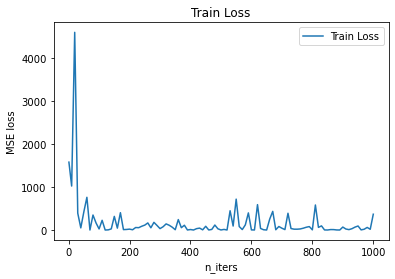

In [40]:
loss_train_values = [i.detach().numpy() for i in loss_train]

plt.plot(iter, loss_train_values)
plt.legend(['Train Loss'])
plt.ylabel('MSE loss')
plt.xlabel('n_iters')
plt.title('Train Loss')
plt.show()

- **We can observe that the PyTorch's SDG optimizer is haphazard but it converges to minima**

# 2) (b) Mini-Batch (batch_size = 5), Scratch, normalization

In [41]:
X = data.drop(columns = ['Concrete compressive strength(MPa, megapascals) '])
y = data['Concrete compressive strength(MPa, megapascals) ']
X = X.astype(np.float32)
y = y.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_norm=(X_train-X_train.mean())/X_train.std() #Standard Normalization
X_0 = [1]*len(X_train_norm)
X_train_norm['X_0'] = X_0

y_train = y_train.to_numpy()

X_test_norm=(X_test-X_test.mean())/X_test.std() #Standard Normalization
X_0_ = [1]*len(X_test_norm)
X_test_norm['X_0'] = X_0_

y_test = y_test.to_numpy()

In [42]:
weights = np.random.randn(X_train_norm.shape[1])
weights = stochastic_gradient_descent(X_train_norm, y_train, weights, 0.000005, 6000, 5, X_test_norm, y_test)

Epoch [1/6000], Loss: 1438.0366
Epoch [1000/6000], Loss: 429.8531
Epoch [2000/6000], Loss: 192.3708
Epoch [3000/6000], Loss: 135.2338
Epoch [4000/6000], Loss: 120.8054
Epoch [5000/6000], Loss: 116.6798
Epoch [6000/6000], Loss: 115.1333


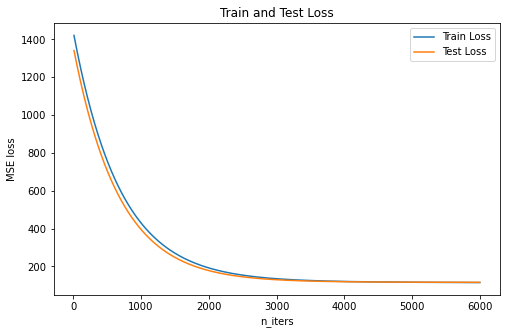

In [43]:
plt.figure(figsize=(8, 5))
a = 1
b = 6000
plt.plot(iter[a:b], loss_train[a:b])
plt.plot(iter[a:b], loss_test[a:b])
plt.legend(['Train Loss', 'Test Loss'])
plt.ylabel('MSE loss')
plt.xlabel('n_iters')
plt.title('Train and Test Loss')
plt.show()

- **Its Noticeable that the descent is very smooth and stable in Mini-Batch gradient descent**

# 2) (b) Mini-Batch (batch_size = 5), PyTorch, normalization

In [44]:
X = data.drop(columns = ['Concrete compressive strength(MPa, megapascals) '])
y = data['Concrete compressive strength(MPa, megapascals) ']

X_norm=(X-X.mean())/X.std() #Standard Normalization

X_norm = X_norm.astype(np.float32)
y = y.astype(np.float32)

X1 = X_norm.to_numpy()
y1 = y.to_numpy()

inputs = torch.from_numpy(X1)
target = torch.from_numpy(y1)

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(inputs, target, test_size=0.3, random_state=42)

train_ds = TensorDataset(inputs, target)

In [45]:
batch_size = 5 # Mini-Batch
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [46]:
model = nn.Linear(X_train_norm.shape[1], 1) # Model
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.2597,  0.2007, -0.1134, -0.1590, -0.0436, -0.1074, -0.2491,  0.1520]],
       requires_grad=True)
Parameter containing:
tensor([0.1177], requires_grad=True)


In [47]:
loss_fn = F.mse_loss

In [48]:
StochasticGradientDescent(2500, 0.00005, model, loss_fn, train_dl)

  0%|          | 2/2500 [00:00<02:48, 14.82it/s]

Epoch [1/2500], Loss: 3152.9680


 10%|█         | 253/2500 [00:14<02:12, 16.90it/s]

Epoch [250/2500], Loss: 341.7636


 20%|██        | 502/2500 [00:29<02:16, 14.66it/s]

Epoch [500/2500], Loss: 281.4197


 30%|███       | 753/2500 [00:44<01:42, 17.01it/s]

Epoch [750/2500], Loss: 105.8031


 40%|████      | 1002/2500 [00:58<01:25, 17.47it/s]

Epoch [1000/2500], Loss: 425.4654


 50%|█████     | 1252/2500 [01:13<01:15, 16.56it/s]

Epoch [1250/2500], Loss: 704.9622


 60%|██████    | 1502/2500 [01:27<00:57, 17.49it/s]

Epoch [1500/2500], Loss: 339.7512


 70%|███████   | 1752/2500 [01:42<00:43, 17.22it/s]

Epoch [1750/2500], Loss: 62.9108


 80%|████████  | 2002/2500 [01:56<00:28, 17.62it/s]

Epoch [2000/2500], Loss: 491.2605


 90%|█████████ | 2252/2500 [02:11<00:14, 17.29it/s]

Epoch [2250/2500], Loss: 228.4344


100%|██████████| 2500/2500 [02:25<00:00, 17.18it/s]

Epoch [2500/2500], Loss: 174.5834


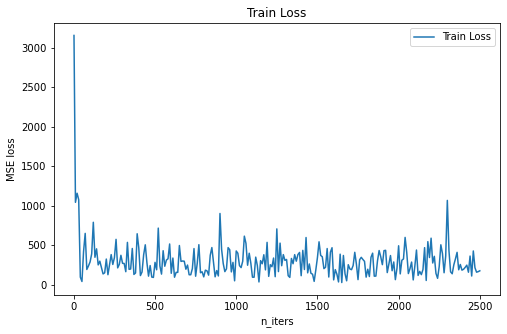

In [49]:
plt.figure(figsize=(8, 5))
loss_train_values = [i.detach().numpy() for i in loss_train]

plt.plot(iter, loss_train_values)
plt.legend(['Train Loss'])
plt.ylabel('MSE loss')
plt.xlabel('n_iters')
plt.title('Train Loss')
plt.show()

- **We can observe that the PyTorch's SDG optimizer for Mini-Batch GD is not smooth but converges very quickly with less number of epochs**

# 3) (a) Momentum Gradient Descent, Scratch, Normalization

$$
\theta_{t} := \theta_{t} -[\alpha \frac{\delta}{\delta \theta}J(\theta_{t}) + \beta \frac{\delta}{\delta \theta}J(\theta_{t-1})]
$$

In [50]:
X = data.drop(columns = ['Concrete compressive strength(MPa, megapascals) '])
y = data['Concrete compressive strength(MPa, megapascals) ']
X = X.astype(np.float32)
y = y.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_norm_MGD=(X_train-X_train.mean())/X_train.std() #Standard Normalization
X_0 = [1]*len(X_train_norm_MGD)
X_train_norm_MGD['X_0'] = X_0

X_test_norm_MGD=(X_test-X_test.mean())/X_test.std() #Standard Normalization
X_0_ = [1]*len(X_test_norm_MGD)
X_test_norm_MGD['X_0'] = X_0_

In [51]:
def momentum_gradient_descent(X, y, weights, alpha, beta, n_iters, X_test, y_test):
    m = X.shape[0]
    i=1
    global loss_train, loss_test, iter, gradients
    loss_train = []
    loss_test = []
    iter = []
    gradients = [0]
    for j in range(n_iters):
        predictions = X @ weights
        errors = predictions - y
        gradient = X.T @ errors / m
        
        weights -= alpha * gradient + beta*gradients[-1]
        
        gradients.append(gradient)
        
        loss = mean_squared_error(y_train, predictions)
        
        if (i == 1) or (i%10 == 0) or (i == n_iters):
            if (i == 1) or (i%1000 == 0) or (i == n_iters):
                print('Epoch [{}/{}], Loss: {:.4f}'.format(i, n_iters, loss))
            
            loss_train.append(loss)
            
            preds_test = X_test @ weights
            loss_t = mean_squared_error(preds_test, y_test)
            loss_test.append(loss_t)
            
            iter.append(i)
        i+=1
    return weights

In [52]:
weights = np.random.randn(X_train_norm_MGD.shape[1])
weights = momentum_gradient_descent(X_train_norm_MGD, y_train, weights, 0.00005, 0.003, 10000, X_test_norm_MGD, y_test)

Epoch [1/10000], Loss: 1674.1613
Epoch [1000/10000], Loss: 117.8748
Epoch [2000/10000], Loss: 112.6346
Epoch [3000/10000], Loss: 111.4952
Epoch [4000/10000], Loss: 110.7045
Epoch [5000/10000], Loss: 110.0963
Epoch [6000/10000], Loss: 109.6069
Epoch [7000/10000], Loss: 109.2057
Epoch [8000/10000], Loss: 108.8742
Epoch [9000/10000], Loss: 108.5996
Epoch [10000/10000], Loss: 108.3718


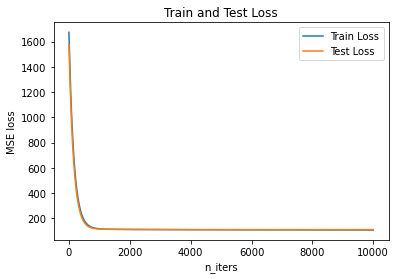

In [53]:
plt.plot(iter, loss_train)
plt.plot(iter, loss_test)
plt.legend(['Train Loss', 'Test Loss'])
plt.ylabel('MSE loss')
plt.xlabel('n_iters')
plt.title('Train and Test Loss')
plt.show()

- **we can see that it converges very fast while using ```momentum``` and oscillations are reduced**

# 3) (b) Momentum Gradient Descent, PyTorch, Normalization

In [54]:
X = data.drop(columns = ['Concrete compressive strength(MPa, megapascals) '])
y = data['Concrete compressive strength(MPa, megapascals) ']

X_norm=(X-X.mean())/X.std() #Standard Normalization

X_norm = X_norm.astype(np.float32)
y = y.astype(np.float32)

In [55]:
X1 = X_norm.to_numpy()
y1 = y.to_numpy()

inputs = torch.from_numpy(X1)
target = torch.from_numpy(y1)

In [56]:
X_train_norm_mgd, X_test_norm_mgd, y_train_norm, y_test_norm = train_test_split(inputs, target, test_size=0.3, random_state=42)

In [57]:
batch_size = X_train_norm_mgd.shape[0] #SGD
train_ds = TensorDataset(inputs, target)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [58]:
model = nn.Linear(X_train_norm_mgd.shape[1], 1) # Model
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.2308, -0.0212, -0.2104,  0.0848, -0.0653, -0.0672,  0.3047, -0.3271]],
       requires_grad=True)
Parameter containing:
tensor([0.0174], requires_grad=True)


In [59]:
loss_fn = F.mse_loss

In [60]:
def MomentumGradientDescent(num_epochs, alpha, momntum, model, loss_fn, train_dl):
    
    opt = torch.optim.SGD(model.parameters(), lr=alpha, momentum=momntum)

    global loss_train, loss_test, iter
    loss_train = []
    iter = []
    i=1
    
    for epoch in tqdm(range(num_epochs)):
        
        for xb,yb in train_dl:            
            pred = model(xb)           
            loss = loss_fn(pred, yb)          
            loss.backward()  
            opt.step()
            opt.zero_grad()
        
        if (i == 1) or (i%100 == 0) or (i == num_epochs):
            if (i == 1) or (i%200 == 0) or (i == num_epochs):
                print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            loss_train.append(loss)
            iter.append(i)
        i+=1

In [61]:
MomentumGradientDescent(1000, 0.0005, 0.9, model, loss_fn, train_dl)

  1%|          | 10/1000 [00:00<00:10, 96.41it/s]

Epoch [1/1000], Loss: 1604.3480


 21%|██▏       | 213/1000 [00:02<00:07, 98.47it/s]

Epoch [200/1000], Loss: 278.9572


 41%|████      | 409/1000 [00:04<00:07, 83.13it/s]

Epoch [400/1000], Loss: 246.5730


 61%|██████▏   | 614/1000 [00:06<00:04, 96.05it/s]

Epoch [600/1000], Loss: 325.1023


 81%|████████  | 811/1000 [00:08<00:01, 94.53it/s]

Epoch [800/1000], Loss: 285.8583


100%|██████████| 1000/1000 [00:11<00:00, 90.31it/s]

Epoch [1000/1000], Loss: 282.4633


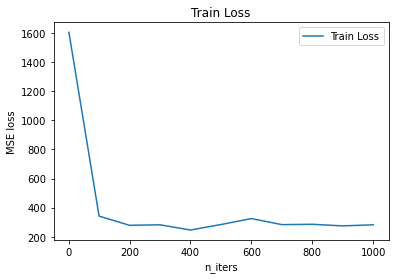

In [62]:
loss_train_values = [i.detach().numpy() for i in loss_train]

plt.plot(iter, loss_train_values)
plt.legend(['Train Loss'])
plt.ylabel('MSE loss')
plt.xlabel('n_iters')
plt.title('Train Loss')
plt.show()

- **Momentum with Mini batch gradient descent, we can observe the convergence rate is very quick and less number of epochs and a small learning rate**

# 4) (a) Nesterov Accelerated Gradient Descent, Scratch, Normalization

$$
w_{look\_ahead} = w_t - \gamma * update_{t-1}  \\
update_{t} = \gamma * update_{t-1} + eta * \nabla w_{look\_ahead}  \\
w_{t+1} = w_t - update_t
$$

In [63]:
def nesterov_gradient_descent(X, y, weights, eta, gamma, n_iters, X_test, y_test):
    m = X.shape[0]
    i=1
    global loss_train, loss_test, iter, updates
    loss_train = []
    loss_test = []
    iter = []
    updates = [0]
    for j in range(n_iters):
        look_ahead = weights - gamma*updates[-1]
        
        predictions = X @ look_ahead
        errors = predictions - y
        gradient = X.T @ errors / m
        
        update = gamma*updates[-1] + eta*gradient
        
        weights -= update
        
        updates.append(update)
        
        loss = mean_squared_error(y_train, predictions)
        
        if (i == 1) or (i%10 == 0) or (i == n_iters):
            if (i == 1) or (i%1000 == 0) or (i == n_iters):
                print('Epoch [{}/{}], Loss: {:.4f}'.format(i, n_iters, loss))
            
            loss_train.append(loss)
            
            preds_test = X_test @ weights
            loss_t = mean_squared_error(preds_test, y_test)
            loss_test.append(loss_t)
            
            iter.append(i)
        i+=1
    return weights

In [64]:
weights = np.random.randn(X_train_norm_MGD.shape[1])
weights = nesterov_gradient_descent(X_train_norm_MGD, y_train, weights, 0.0005, 0.03, 10000, X_test_norm_MGD, y_test)

Epoch [1/10000], Loss: 1641.3100
Epoch [1000/10000], Loss: 650.7098
Epoch [2000/10000], Loss: 306.1570
Epoch [3000/10000], Loss: 184.6289
Epoch [4000/10000], Loss: 141.0797
Epoch [5000/10000], Loss: 125.0996
Epoch [6000/10000], Loss: 118.9709
Epoch [7000/10000], Loss: 116.4126
Epoch [8000/10000], Loss: 115.1794
Epoch [9000/10000], Loss: 114.4606
Epoch [10000/10000], Loss: 113.9588


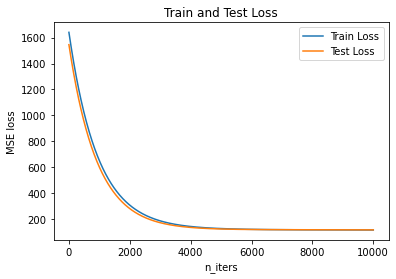

In [65]:
plt.plot(iter, loss_train)
plt.plot(iter, loss_test)
plt.legend(['Train Loss', 'Test Loss'])
plt.ylabel('MSE loss')
plt.xlabel('n_iters')
plt.title('Train and Test Loss')
plt.show()

- **The key idea behind NAG is to add momentum to the gradient descent algorithm, which helps the optimizer to converge faster and avoid getting stuck in local minima. NAG adds a correction term to the gradient descent update based on the current velocity of the optimizer, which helps to balance the trade-off between convergence speed and the risk of overshooting the minimum**

# 4) (b) Nesterov Accelerated Gradient Descent, PyTorch, Normalization

In [66]:
model = nn.Linear(X_train_norm_mgd.shape[1], 1) # Model
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.3081, -0.1891,  0.2406, -0.1156,  0.2386,  0.3272,  0.0125,  0.2713]],
       requires_grad=True)
Parameter containing:
tensor([-0.2388], requires_grad=True)


In [67]:
def NesterovGradientDescent(num_epochs, alpha, model, momntum, dampening, loss_fn, train_dl):
    
    opt = torch.optim.SGD(model.parameters(), lr=alpha, momentum = momntum, nesterov=True)

    global loss_train, loss_test, iter
    loss_train = []
    iter = []
    i=1
    
    for epoch in tqdm(range(num_epochs)):
        
        for xb,yb in train_dl:            
            pred = model(xb)           
            loss = loss_fn(pred, yb)          
            loss.backward()  
            opt.step()
            opt.zero_grad()
        
        if (i == 1) or (i%100 == 0) or (i == num_epochs):
            if (i == 1) or (i%200 == 0) or (i == num_epochs):
                print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            loss_train.append(loss)
            iter.append(i)
        i+=1

In [68]:
NesterovGradientDescent(1000, 0.005, model, 0.03, 0, loss_fn, train_dl)

  1%|          | 10/1000 [00:00<00:10, 91.45it/s]

Epoch [1/1000], Loss: 1499.7609


 21%|██        | 212/1000 [00:02<00:07, 102.44it/s]

Epoch [200/1000], Loss: 289.1649


 42%|████▏     | 416/1000 [00:04<00:05, 100.27it/s]

Epoch [400/1000], Loss: 277.0341


 61%|██████▏   | 614/1000 [00:06<00:04, 86.32it/s] 

Epoch [600/1000], Loss: 288.2809


 82%|████████▏ | 819/1000 [00:08<00:01, 98.38it/s] 

Epoch [800/1000], Loss: 251.0816


100%|██████████| 1000/1000 [00:10<00:00, 92.87it/s]

Epoch [1000/1000], Loss: 249.2602


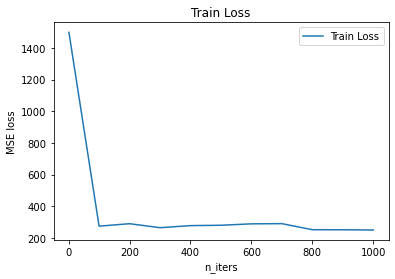

In [69]:
loss_train_values = [i.detach().numpy() for i in loss_train]

plt.plot(iter, loss_train_values)
plt.legend(['Train Loss'])
plt.ylabel('MSE loss')
plt.xlabel('n_iters')
plt.title('Train Loss')
plt.show()

- **The key idea behind NAG is to add momentum to the gradient descent algorithm, which helps the optimizer to converge faster and avoid getting stuck in local minima.**

$$
Thank You
$$